In [63]:
import praw
import pandas as pd
import datetime as dt
from prawcore.exceptions import ResponseException
import numpy as np

In [19]:
reddit = praw.Reddit(client_id='l-_giPjAG6R_lA', \
                     client_secret='2g-Zjl-9gqlwE09ozb88rBvx_HssKA', \
                     user_agent='hello_I_nice', \
                     username='coffeefebutter', \
                     password='aswinbio123')

print(reddit.user.me())

coffeefebutter


In [44]:
sub = ['Askreddit','TrueReddit','changemyview','Foodforthought','redditdotcom','Ask_Politics','TalesFromRetail','AskHistorians','self','AskSocialScience','explainlikeimfive','offmychest','explainlikeIAmA','askscience','NoStupidQuestions','thatHappened','indepthstories']
topics_dict = {"title":[], 
               "score":[], 
               "id":[],  
               "comms_num": [], 
               "created": [], 
               "body":[]}

for s in sub:
    
    subreddit = reddit.subreddit(s) 
    
    print(subreddit)
    top_subreddit = subreddit.top(limit=500)
    #topics_dict = {"title":[], 
     #              "score":[], 
      ##             "id":[],  
        #           "comms_num": [], 
         #          "created": [], 
          #         "body":[]}
    for submission in top_subreddit:
        #print(submission)
        topics_dict["title"].append(submission.title)
        topics_dict["score"].append(submission.score)
        topics_dict["id"].append(submission.id)
        #topics_dict["url"].append(submission.url)
        topics_dict["comms_num"].append(submission.num_comments)
        topics_dict["created"].append(submission.created)
        topics_dict["body"].append(submission.selftext)
    
        reddit_data = pd.DataFrame(topics_dict)


Askreddit
TrueReddit
changemyview
Foodforthought
redditdotcom
Ask_Politics
TalesFromRetail
AskHistorians
self
AskSocialScience
explainlikeimfive
offmychest
explainlikeIAmA
askscience
NoStupidQuestions
thatHappened
indepthstories


In [45]:
reddit_data.to_csv('final_output.csv', index=False) 


In [46]:
reddit_data

,title,score,id,comms_num,created,body
0,"People who haven't pooped in 2019 yet, why are...",221858,ablzuq,8008,1.546406e+09,
1,How would you feel about Reddit adding 3 NSFW ...,201332,l7530r,2712,1.611889e+09,
2,Would you watch a show where a billionaire CEO...,197515,f08dxb,13493,1.581098e+09,
3,"What if God came down one day and said ""It's p...",195823,iwedc5,10419,1.600639e+09,
4,How would you feel about a feature where if so...,186371,draola,2823,1.572861e+09,
...,...,...,...,...,...,...
8495,Texas Couple Exonerated 25 Years After Being C...,67,6il13q,11,1.498071e+09,
8496,Rigged: Forced into debt. Worked past exhausti...,63,6hx7u7,4,1.497780e+09,
8497,Trump's Data Team Saw A Different America -- A...,66,5cgxaj,4,1.478927e+09,
8498,The Contestant who Outsmarted The Price is Right,63,4zh4a8,4,1.472134e+09,


In [48]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [50]:
_timestamp = reddit_data["created"].apply(get_date)

reddit_data = reddit_data.assign(timestamp = _timestamp)

In [51]:
reddit_data

,title,score,id,comms_num,created,body,timestamp
0,"People who haven't pooped in 2019 yet, why are...",221858,ablzuq,8008,1.546406e+09,,2019-01-02 06:06:27
1,How would you feel about Reddit adding 3 NSFW ...,201332,l7530r,2712,1.611889e+09,,2021-01-29 03:51:22
2,Would you watch a show where a billionaire CEO...,197515,f08dxb,13493,1.581098e+09,,2020-02-07 18:53:32
3,"What if God came down one day and said ""It's p...",195823,iwedc5,10419,1.600639e+09,,2020-09-21 00:01:51
4,How would you feel about a feature where if so...,186371,draola,2823,1.572861e+09,,2019-11-04 10:57:46
...,...,...,...,...,...,...,...
8495,Texas Couple Exonerated 25 Years After Being C...,67,6il13q,11,1.498071e+09,,2017-06-21 20:46:06
8496,Rigged: Forced into debt. Worked past exhausti...,63,6hx7u7,4,1.497780e+09,,2017-06-18 11:51:53
8497,Trump's Data Team Saw A Different America -- A...,66,5cgxaj,4,1.478927e+09,,2016-11-12 06:11:37
8498,The Contestant who Outsmarted The Price is Right,63,4zh4a8,4,1.472134e+09,,2016-08-25 16:07:43


In [59]:
reddit_data.columns = ['title', 'upvotes','ID','comments','created','body','time_posted']


In [52]:
def eda(dataframe):
    print ("missing values \n", dataframe.isnull().sum())
    print ("dataframe index \n", dataframe.index)
    print ("dataframe types \n", dataframe.dtypes)
    print ("dataframe shape \n", dataframe.shape)
    print ("dataframe describe \n", dataframe.describe())
    for item in dataframe:
        print (item)
        print (dataframe[item].nunique())

In [53]:
eda(reddit_data)

missing values 
 title        0
score        0
id           0
comms_num    0
created      0
body         0
timestamp    0
dtype: int64
dataframe index 
 RangeIndex(start=0, stop=8500, step=1)
dataframe types 
 title                object
score                 int64
id                   object
comms_num             int64
created             float64
body                 object
timestamp    datetime64[ns]
dtype: object
dataframe shape 
 (8500, 7)
dataframe describe 
                score     comms_num       created
count    8500.000000   8500.000000  8.500000e+03
mean    11109.467059   1424.146588  1.528504e+09
std     20303.611949   4873.544028  7.810174e+07
min        15.000000      0.000000  1.290819e+09
25%       370.750000     53.000000  1.487079e+09
50%      3719.500000    210.000000  1.552982e+09
75%     13755.000000    672.000000  1.592543e+09
max    221858.000000  69741.000000  1.617292e+09
title
8449
score
5606
id
8500
comms_num
2132
created
8500
body
3890
timestamp
8500


In [54]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [56]:
reddit_data['title'].nunique()

8449

In [61]:
reddit_data = reddit_data.drop_duplicates(subset=['title'],keep='last',inplace=False)

In [ ]:
To Calculate the median of comment in the Askreddit subreddit

In [65]:
med_comments = reddit_data['comments'].median() 
reddit_data['Above_Below_Median'] = np.where(reddit_data['comments']>=med_comments, 'Above', 'Below')





<ipython-input-65-e96ab84cd547>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_data['Above_Below_Median'] = np.where(reddit_data['comments']>=med_comments, 'Above', 'Below')


In [66]:

med_dist = reddit_data['Above_Below_Median'].value_counts()/len(reddit_data)
med_dist

Above    0.500059
Below    0.499941
Name: Above_Below_Median, dtype: float64

In [ ]:
above 50% Reddit posts that have more than the median number of comments. It just confirms that we have so many Reddit posts in this sample that have a low number of comments.

In [ ]:
To identify the day of the week:

In [70]:
reddit_data['time_posted'] = pd.to_datetime(reddit_data['time_posted'], format = '%Y-%m-%d %H:%M:%S')

reddit_data['Day of Week'] = reddit_data['time_posted'].dt.day_name()

<ipython-input-70-35b5422e8cd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_data['time_posted'] = pd.to_datetime(reddit_data['time_posted'], format = '%Y-%m-%d %H:%M:%S')
<ipython-input-70-35b5422e8cd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_data['Day of Week'] = reddit_data['time_posted'].dt.day_name()


In [75]:
reddit_data

,title,upvotes,ID,comments,created,body,time_posted,Above_Below_Median,Day of Week,counter
0,"People who haven't pooped in 2019 yet, why are...",221858,ablzuq,8008,1.546406e+09,,2019-01-02 06:06:27,Above,Wednesday,0
1,How would you feel about Reddit adding 3 NSFW ...,201332,l7530r,2712,1.611889e+09,,2021-01-29 03:51:22,Above,Friday,1
2,Would you watch a show where a billionaire CEO...,197515,f08dxb,13493,1.581098e+09,,2020-02-07 18:53:32,Above,Friday,2
3,"What if God came down one day and said ""It's p...",195823,iwedc5,10419,1.600639e+09,,2020-09-21 00:01:51,Above,Monday,3
4,How would you feel about a feature where if so...,186371,draola,2823,1.572861e+09,,2019-11-04 10:57:46,Above,Monday,4
...,...,...,...,...,...,...,...,...,...,...
8495,Texas Couple Exonerated 25 Years After Being C...,67,6il13q,11,1.498071e+09,,2017-06-21 20:46:06,Below,Wednesday,8444
8496,Rigged: Forced into debt. Worked past exhausti...,63,6hx7u7,4,1.497780e+09,,2017-06-18 11:51:53,Below,Sunday,8445
8497,Trump's Data Team Saw A Different America -- A...,66,5cgxaj,4,1.478927e+09,,2016-11-12 06:11:37,Below,Saturday,8446
8498,The Contestant who Outsmarted The Price is Right,63,4zh4a8,4,1.472134e+09,,2016-08-25 16:07:43,Below,Thursday,8447


In [74]:
reddit_data['counter'] = np.arange(reddit_data.shape[0])

<ipython-input-74-e6b70f44ca15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_data['counter'] = np.arange(reddit_data.shape[0])


In [94]:
askreddit = reddit_data.head(500)#take data only from askreddit
CMV = reddit_data.iloc[1000:1500] #to choose a subset of rows that I know belongs to CMV subreddit
to_plot = askreddit['Day of Week']
values = CMV['Day of Week']

In [101]:
to_plot.value_counts()
freq_askreddit = to_plot.tolist()

<AxesSubplot:>

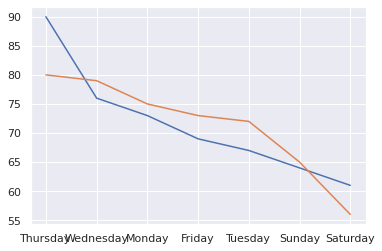

In [104]:
to_plot.value_counts().plot() #blue
values.value_counts().plot() #orange

<AxesSubplot:xlabel='upvotes', ylabel='comments'>

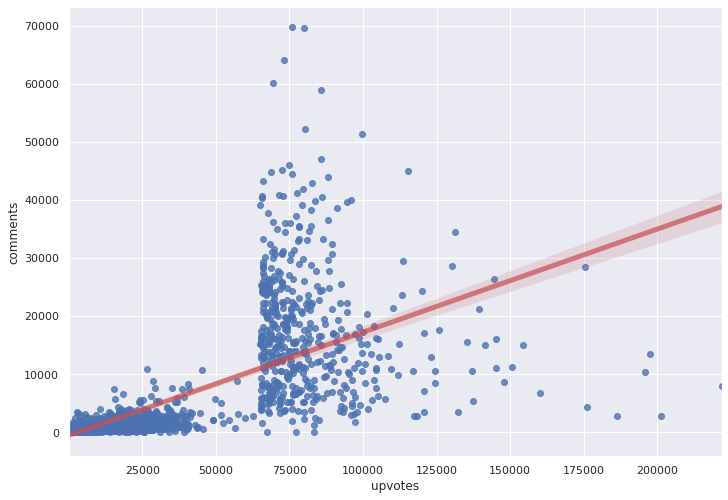

In [106]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x=reddit_data['upvotes'], y=reddit_data['comments'], 
            line_kws={"color":"r","alpha":0.7,"lw":5})


In [107]:
reddit_data['upvotes'].max()

221858

<AxesSubplot:xlabel='upvotes', ylabel='comments'>

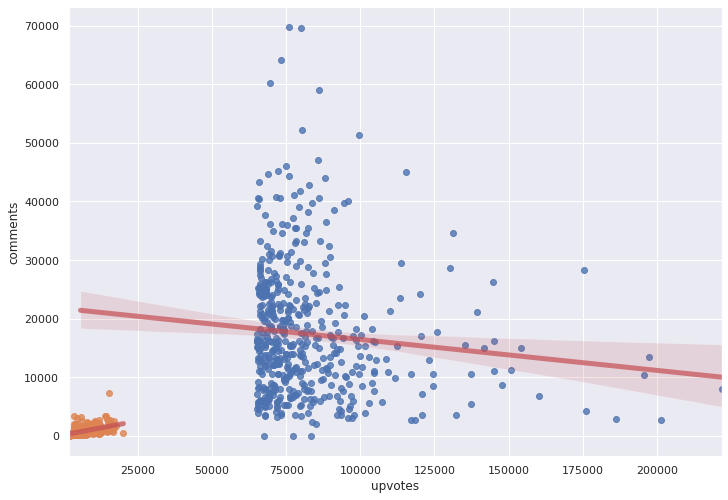

In [110]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x=askreddit['upvotes'], y=askreddit['comments'], 
            line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=CMV['upvotes'], y=CMV['comments'], 
            line_kws={"color":"r","alpha":0.7,"lw":5})

<AxesSubplot:xlabel='upvotes', ylabel='comments'>

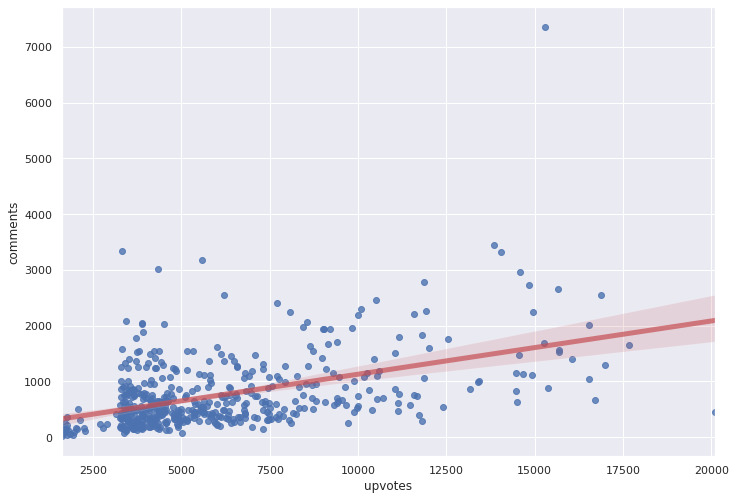

In [111]:

sns.regplot(x=CMV['upvotes'], y=CMV['comments'], 
            line_kws={"color":"r","alpha":0.7,"lw":5})